In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [9]:
ud_df = pd.read_csv("salary_data_cleaned.csv")

In [10]:
ud_df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1


In [11]:
# Separate features and target variable
X = ud_df.drop('avg_salary', axis=1)
y = ud_df['avg_salary']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=37)

# Concatenate training and test data to ensure consistent one-hot encoding
concatenated_data = pd.concat([x_train, x_test], axis=0)

# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
concatenated_encoded = encoder.fit_transform(concatenated_data)

# Determine the index to split the concatenated data back into training and test sets
split_index = len(x_train)

# Split the concatenated encoded data back into training and test sets
x_train_encoded = concatenated_encoded[:split_index]
x_test_encoded = concatenated_encoded[split_index:]

# Scale numerical features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_encoded)
x_test_scaled = scaler.transform(x_test_encoded)

# Build and train linear regression model
reg_model = LinearRegression()
reg_model.fit(x_train_scaled, y_train)

# Evaluate the model using mean absolute error (MAE)
y_pred = reg_model.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Cross-validation to estimate model performance
cv_scores = cross_val_score(reg_model, x_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
print("Cross-Validation MAE Scores:", -cv_scores)

C:\Users\ednit\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Mean Absolute Error (MAE): 11.442437972010921
Cross-Validation MAE Scores: [15.49019191 11.2723575  15.37786507 12.19473637 12.23834937]


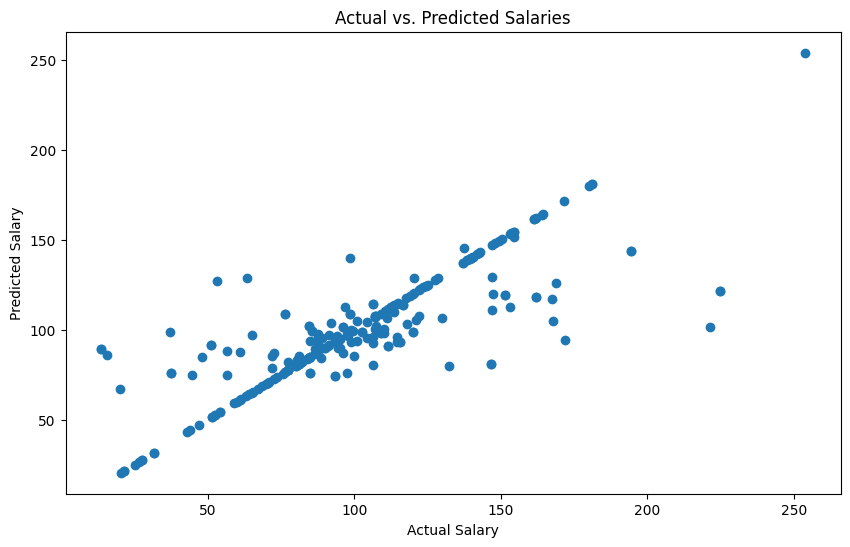

In [12]:
# Plot the predicted vs. actual salaries
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs. Predicted Salaries")
plt.show()